# DATA ANALYSIS REPORT

## INTRODUCTION

This report will examine a data set to find out key patterns through exploration and models. Exploration part will focus on finding patterns through visualizations and descriptive statistics while the modeling part will focus on formal analysis of the patterns identified during exploration stage. Descriptive statistics like the mean, variance and standard deviation will be computed for continuous variables while frequency counts will be done on categorical columns.

## EXPLORATORY ANALYSIS

In [1]:
# load required packages

import pandas as pd
import seaborn as sns
import numpy as np
import os

os.chdir('C:/Users/LENZ/Desktop/Heart Disease Indicator')

#import the data

dataset = pd.read_csv('dataset.csv')
dataset.shape

(319795, 18)

## Descriptive statistics for continuous columns

In [2]:
np.round(dataset.describe(), 3)

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000,319795.000,319795.000,319795.000
mean,28.325,3.372,3.898,7.097
std,6.356,7.951,7.955,1.436
min,12.020,0.000,0.000,1.000
25%,24.030,0.000,0.000,6.000
50%,27.340,0.000,0.000,7.000
75%,31.420,2.000,3.000,8.000
max,94.850,30.000,30.000,24.000


The average value for BMI is 28.325, the standard deviation is 6.356, the minimum value is 12.020 and the maximum value is 94.850.

The average value for physical health is 3.372, the standard deviation is 7.951, the minimum value is 0 while the maximum value is 30.

The average value for mental health is 3.898, the standard deviation is 7.955, the minimum value is 0 while the maximum value is 30.

The average value for sleep time 7.097, the standard deviation is 1.436, the minimum value is 1 while the maximum value is 24.

## Frequency counts for categorical variables

For categorical colums we present frequency counts as shown below

In [3]:
dataset['HeartDisease'].value_counts()

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64

In [4]:
dataset['Smoking'].value_counts()

Smoking
No     187887
Yes    131908
Name: count, dtype: int64

In [5]:
dataset['AlcoholDrinking'].value_counts()

AlcoholDrinking
No     298018
Yes     21777
Name: count, dtype: int64

In [6]:
dataset['Stroke'].value_counts()

Stroke
No     307726
Yes     12069
Name: count, dtype: int64

In [7]:
dataset['DiffWalking'].value_counts()

DiffWalking
No     275385
Yes     44410
Name: count, dtype: int64

In [8]:
dataset['Sex'].value_counts()

Sex
Female    167805
Male      151990
Name: count, dtype: int64

In [9]:
dataset['AgeCategory'].value_counts()

AgeCategory
65-69          34151
60-64          33686
70-74          31065
55-59          29757
50-54          25382
80 or older    24153
45-49          21791
75-79          21482
18-24          21064
40-44          21006
35-39          20550
30-34          18753
25-29          16955
Name: count, dtype: int64

In [10]:
dataset['Race'].value_counts()

Race
White                             245212
Hispanic                           27446
Black                              22939
Other                              10928
Asian                               8068
American Indian/Alaskan Native      5202
Name: count, dtype: int64

In [11]:
dataset['Diabetic'].value_counts()

Diabetic
No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: count, dtype: int64

In [12]:
dataset['PhysicalActivity'].value_counts()

PhysicalActivity
Yes    247957
No      71838
Name: count, dtype: int64

In [13]:
dataset['GenHealth'].value_counts()

GenHealth
Very good    113858
Good          93129
Excellent     66842
Fair          34677
Poor          11289
Name: count, dtype: int64

In [14]:
dataset['Asthma'].value_counts()

Asthma
No     276923
Yes     42872
Name: count, dtype: int64

In [15]:
dataset['KidneyDisease'].value_counts()

KidneyDisease
No     308016
Yes     11779
Name: count, dtype: int64

In [16]:
dataset['SkinCancer'].value_counts()

SkinCancer
No     289976
Yes     29819
Name: count, dtype: int64

## Visualizations

For continuous variables, histograms will be appropriate in visualizing their distribution while for categorical columns, bar charts will be more appropriate.

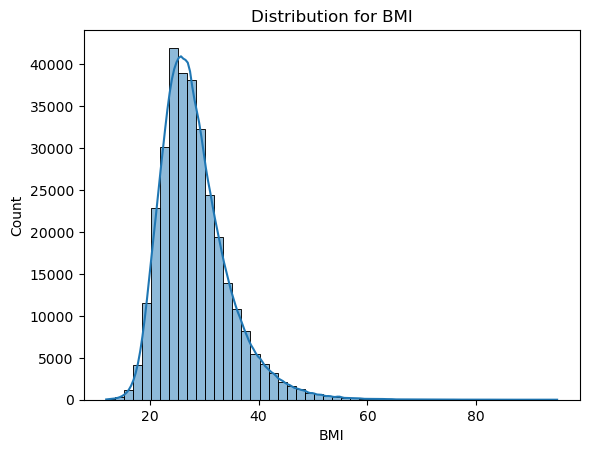

In [17]:
sns.histplot(data = dataset, x = 'BMI', kde = True, bins = 50).set(title = 'Distribution for BMI');

The distribution of BMI values seems to follow a normal distribution as shown in the above histogram.

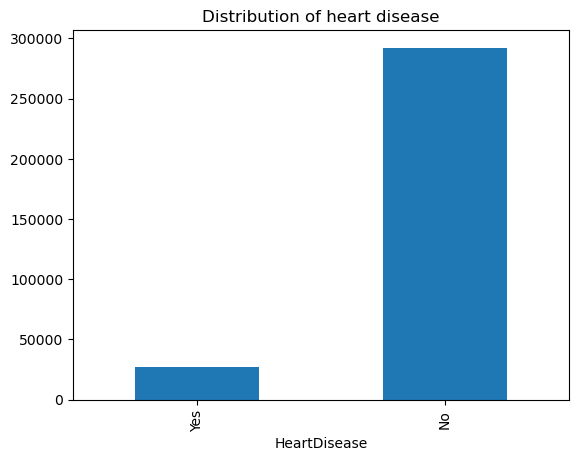

In [18]:
dataset['HeartDisease'].value_counts().sort_values().plot(kind='bar').set(title = 'Distribution of heart disease');

Fewer people were diagonized with the heart disease.

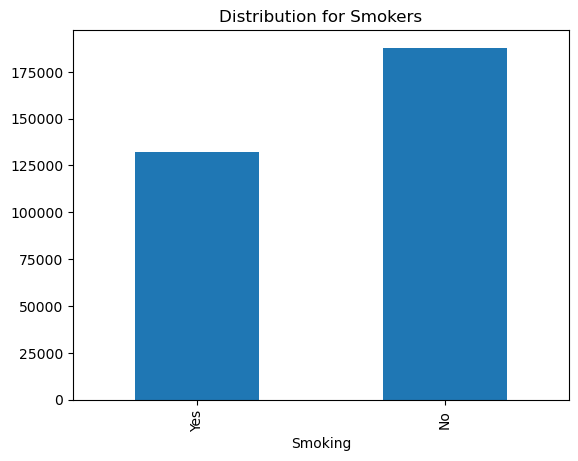

In [19]:
dataset['Smoking'].value_counts().sort_values().plot(kind='bar').set(title = 'Distribution for Smokers');

There are more non-smokers as compared to smokers.

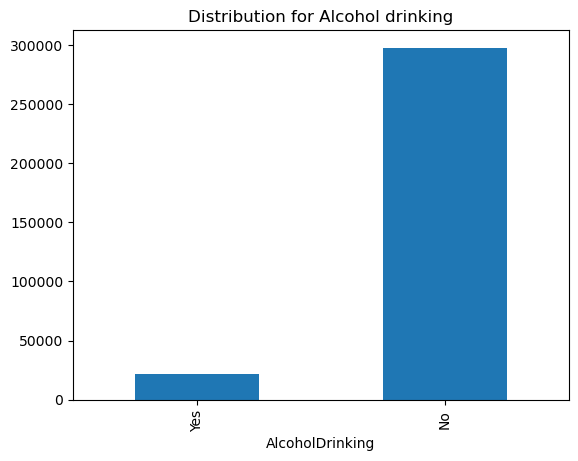

In [20]:
dataset['AlcoholDrinking'].value_counts().sort_values().plot(kind='bar').set(title = 'Distribution for Alcohol drinking');

Fewer people were found to be taking alcohol.

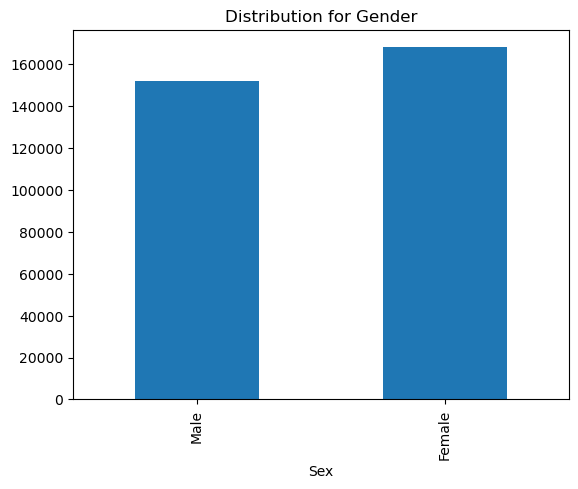

In [21]:
dataset['Sex'].value_counts().sort_values().plot(kind='bar').set(title = 'Distribution for Gender');

We had slightly more females than males in this sample.

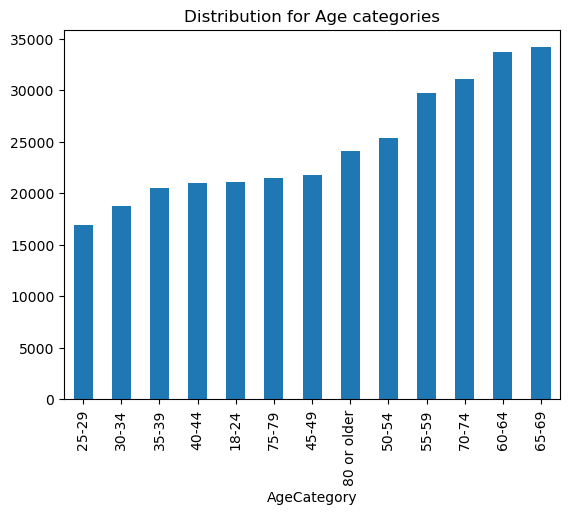

In [22]:
dataset['AgeCategory'].value_counts().sort_values().plot(kind='bar').set(title = 'Distribution for Age categories');

More people were in the 65-69 age group.

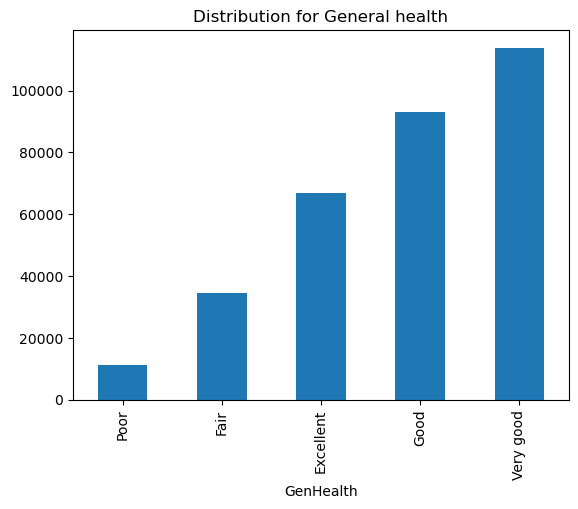

In [23]:
dataset['GenHealth'].value_counts().sort_values().plot(kind='bar').set(title = 'Distribution for General health');


Most participants were found in the very good category while few participants were found to have poor health.

## MODELING

In this section we focus on building models to predict the dependent variable based on a set of independent variables.

The dependent variable is heart disease and the remaining variables will be used as independent or predictor variables. The dependent variable is categorical in nature with two categories, so a binary classification model will be appropriate for this data set.

## Data preparation

We will encode categorical columns and scale continuous columns. After that we will split the data set into training and test sets so that we can be able to evaluate the performance of our classification models.

In [24]:
dataset.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [25]:
#transform character colums to category type

dataset['Sex'] = dataset['Sex'].astype('category') 
dataset['SkinCancer'] = dataset['SkinCancer'].astype('category') 
dataset['Smoking'] = dataset['Smoking'].astype('category') 
dataset['AlcoholDrinking'] = dataset['AlcoholDrinking'].astype('category') 
dataset['Stroke'] = dataset['Stroke'].astype('category') 
dataset['DiffWalking'] = dataset['DiffWalking'].astype('category') 
dataset['AgeCategory'] = dataset['AgeCategory'].astype('category') 
dataset['Race'] = dataset['Race'].astype('category') 
dataset['Diabetic'] = dataset['Diabetic'].astype('category') 
dataset['PhysicalActivity'] = dataset['PhysicalActivity'].astype('category') 
dataset['GenHealth'] = dataset['GenHealth'].astype('category') 
dataset['Asthma'] = dataset['Asthma'].astype('category') 
dataset['KidneyDisease'] = dataset['KidneyDisease'].astype('category') 


#extract the codes from categorical columns

dataset['Sex'] = dataset['Sex'].cat.codes 
dataset['SkinCancer'] = dataset['SkinCancer'].cat.codes 
dataset['Smoking'] = dataset['Smoking'].cat.codes 
dataset['AlcoholDrinking'] = dataset['AlcoholDrinking'].cat.codes 
dataset['Stroke'] = dataset['Stroke'].cat.codes 
dataset['DiffWalking'] = dataset['DiffWalking'].cat.codes 
dataset['AgeCategory'] = dataset['AgeCategory'].cat.codes 
dataset['Race'] = dataset['Race'].cat.codes 
dataset['Diabetic'] = dataset['Diabetic'].cat.codes 
dataset['PhysicalActivity'] = dataset['PhysicalActivity'].cat.codes 
dataset['GenHealth'] = dataset['GenHealth'].cat.codes 
dataset['Asthma'] = dataset['Asthma'].cat.codes 
dataset['KidneyDisease'] = dataset['KidneyDisease'].cat.codes 


In [26]:
X = dataset.iloc[:, 1:18].values
y = dataset.iloc[:, 0].values

In [27]:
X

array([[16.6 ,  1.  ,  0.  , ...,  1.  ,  0.  ,  1.  ],
       [20.34,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [26.58,  1.  ,  0.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [24.24,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [32.81,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [46.56,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
# split the dataset into train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the logistic regression model on the training set

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [32]:
# predict the test set

y_pred = classifier.predict(X_test)

## Confusion matrix and the accuracy score

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[72551   586]
 [ 6214   598]]


0.9149457779334326

The accuracy score is 91.49% for this classification model.

## Decision tree model

In this section we consider another classification model called the decision tree model and compare its performance with the logistic classifier.

In [34]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [35]:
y_pred = classifier.predict(X_test)

### Confusion matrix and the accuracy score

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[67660  5477]
 [ 5117  1695]]


0.8674905252098213

The accuracy score for the decision tree model (86.75%) is lower as compared to the accuracy score of the logistic classifier.

## Random forest classification model

The random forest model is a combination of several decision trees in attempt to increase the accuracy score. Let's see how this model performs on the current data set.

In [37]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [38]:
##predict the test set
y_pred = classifier.predict(X_test)

### Confusion matrix and the accuracy score

In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[71617  1520]
 [ 6060   752]]


0.905189558343444

The performance is not significantly different from the performance of the logistic regression classifier. Accuracy score is 90.52% while the logistic model gave us 91.49%.

## Conclusions

The main objective of the analysis was to find out key predictors for the heart disease condition. The predictors for this condition include smoking status, alcohol drinking status, sex, race, a measure of general health among others.

Since the dependent variable is binary in nature, classification models were explored in this analysis. The core models that were analysed include the logistic regression classifier, the decision tree classifier and the random forest classifier.

The logistic regression classifier resulted in an accuracy score of 91.49%, the decision tree classifier produced an accuracy score of 86.75% while the random forest classifier resulted in an accuracy score.

In general both the the logistic regression model and the random forest model are good classification models that can be used to predict whether someone will get the heart disease or not based on the available features in this data set.